# Transfer learning
Deze transfer learning heb ik van de keras website

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
base_model = keras.applications.Xception(
    #Laad de gewichten die al gepretrained zijn op imagenet
    weights='imagenet', 
    input_shape=(150, 150, 3),
    #De de bovenstente gedeelte van het imagenet classifier wordt niet meegenomen
    include_top=False) 

In [3]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 18, 18, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 18, 18, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 9, 9, 728)    186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 9, 9, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 9, 9, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 9, 9, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 9, 9, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 9, 9, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 9, 9, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_10[0][0]']                 
 on)      

In [4]:
#hiermee hebben we een nieuw model boven op de base model gecreeerd
inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs)
# Een laag voor het verkleinen van de afmetingen zonder dat er informatie verloren gaat
# Met deze laag wordt het trainen gemakkelijker gemaakt
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
__________________________________________

Het doel voor deze transfer learning is om de model meer te specialiseren in het herkennen van honden en katten

In [6]:
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:25%]", "train[25%:30%]", "train[30%:35%]"],
    as_supervised=True,  # Include labels
)

In [7]:
print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds)
)
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Number of training samples: 5816
Number of validation samples: 1163
Number of test samples: 1163


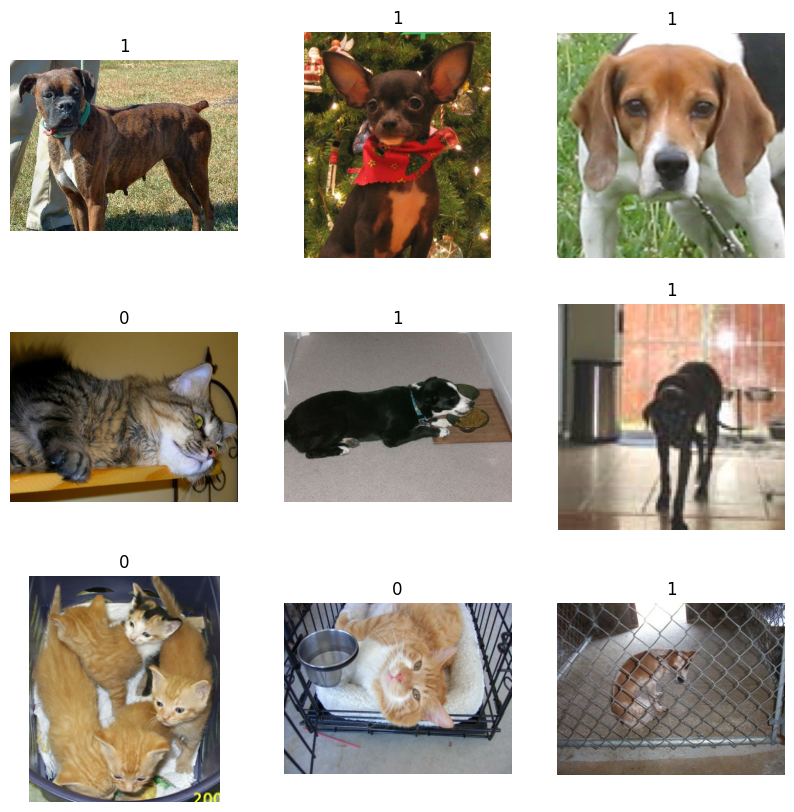

In [8]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [9]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
182/182 [==============================] - 1062s 6s/step - loss: 0.2450 - binary_accuracy: 0.8865 - val_loss: 0.2884 - val_binary_accuracy: 0.9192
Epoch 2/10
182/182 [==============================] - 1032s 6s/step - loss: 0.1156 - binary_accuracy: 0.9494 - val_loss: 0.2341 - val_binary_accuracy: 0.9450
Epoch 3/10
182/182 [==============================] - 8155s 45s/step - loss: 0.0477 - binary_accuracy: 0.9811 - val_loss: 0.2442 - val_binary_accuracy: 0.9149
Epoch 4/10
182/182 [==============================] - 1026s 6s/step - loss: 0.0514 - binary_accuracy: 0.9804 - val_loss: 0.8637 - val_binary_accuracy: 0.8727
Epoch 5/10
182/182 [==============================] - 2953s 16s/step - loss: 0.0459 - binary_accuracy: 0.9840 - val_loss: 0.6516 - val_binary_accuracy: 0.8684
Epoch 6/10
182/182 [==============================] - 1002s 6s/step - loss: 0.0318 - binary_accuracy: 0.9890 - val_loss: 0.4977 - val_binary_accuracy: 0.8839
Epoch 7/10
182/182 [==============================